<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/ML_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Loading iris data

In [5]:
iris = load_iris()

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris_df['target'] = iris_df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [10]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


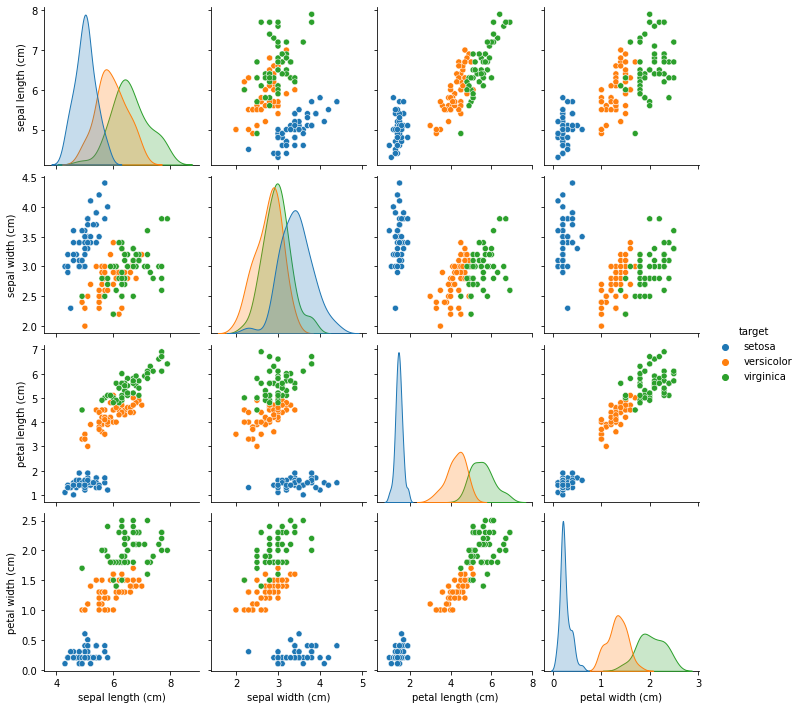

In [11]:
sns.pairplot(iris_df, hue = 'target')
plt.show()

# Preparing Dataframe

In [23]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=iris['feature_names']
data = pd.concat([data, labels], axis = 1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Model(Hierachical Clustering - single method)

In [51]:
HC_single = linkage(data, method = 'single', metric='euclidean')

### Visualization Using Dendrogram

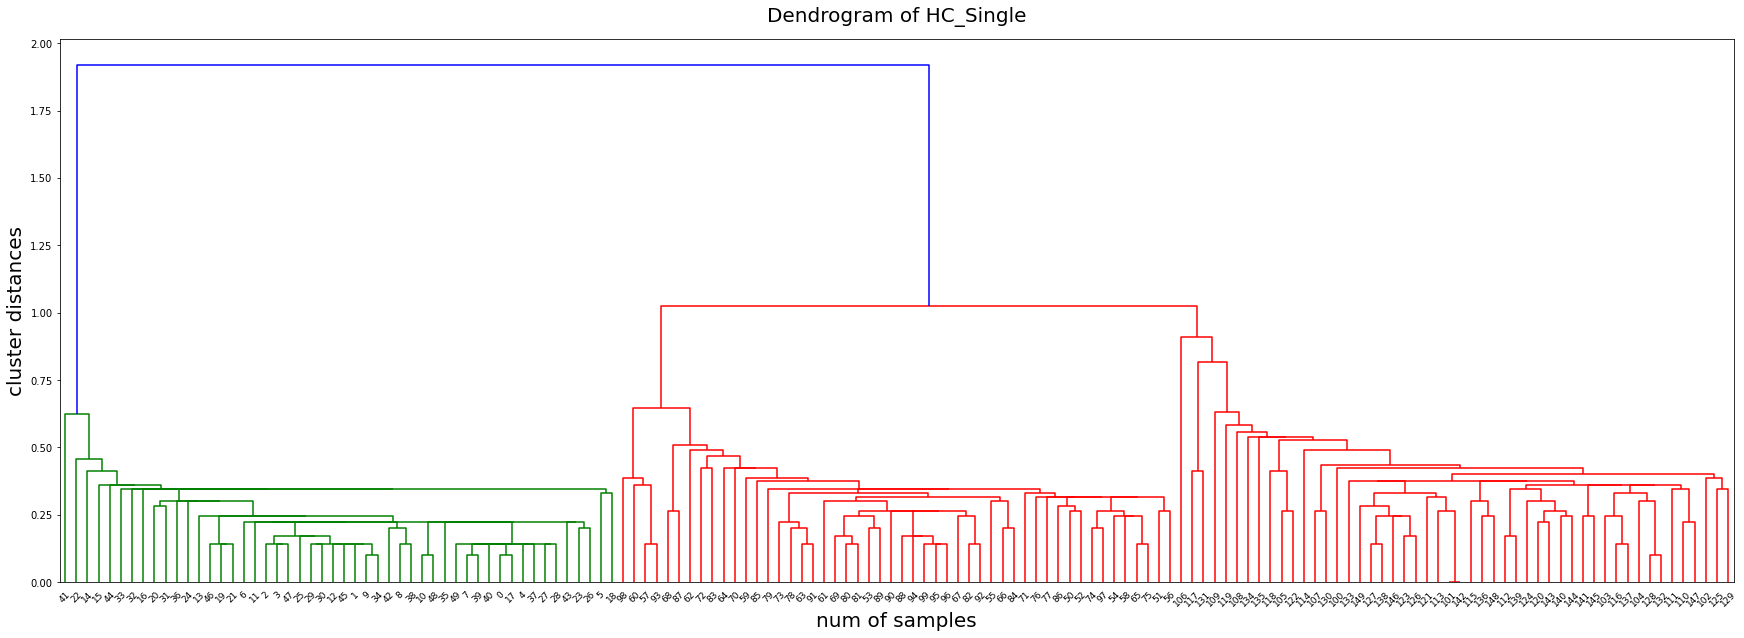

In [131]:
plt.figure(figsize = (30, 10))
dendrogram(HC_single,
           leaf_rotation = 45,
           leaf_font_size = 9
           )
plt.title("Dendrogram of HC_Single", size = 20, y = 1.02)
plt.xlabel('num of samples', size = 20)
plt.ylabel('cluster distances', size = 20)
plt.show()

### Predict Accuracy

In [149]:
predict = pd.DataFrame(fcluster(HC_single, 1, criterion='distance'))
predict.columns=['predict']
crosstab = pd.crosstab(predict['predict'], labels['labels'])
crosstab

labels,0,1,2
predict,,,
1,50,0,0
2,0,50,0
3,0,0,50


In [156]:
predict = fcluster(HC_single, 1, criterion='distance')
accuracy = accuracy_score(iris['target'] + 1, predict)
print('Mean accuracy score : {}%'.format(accuracy * 100))

Mean accuracy score : 100.0%


- 모두 제대로 분류되었다.

# Model(Hierachical Clustering - complete method)

In [75]:
HC_complete = linkage(data, method = 'complete', metric='euclidean')

### Visualization Using Dendrogram

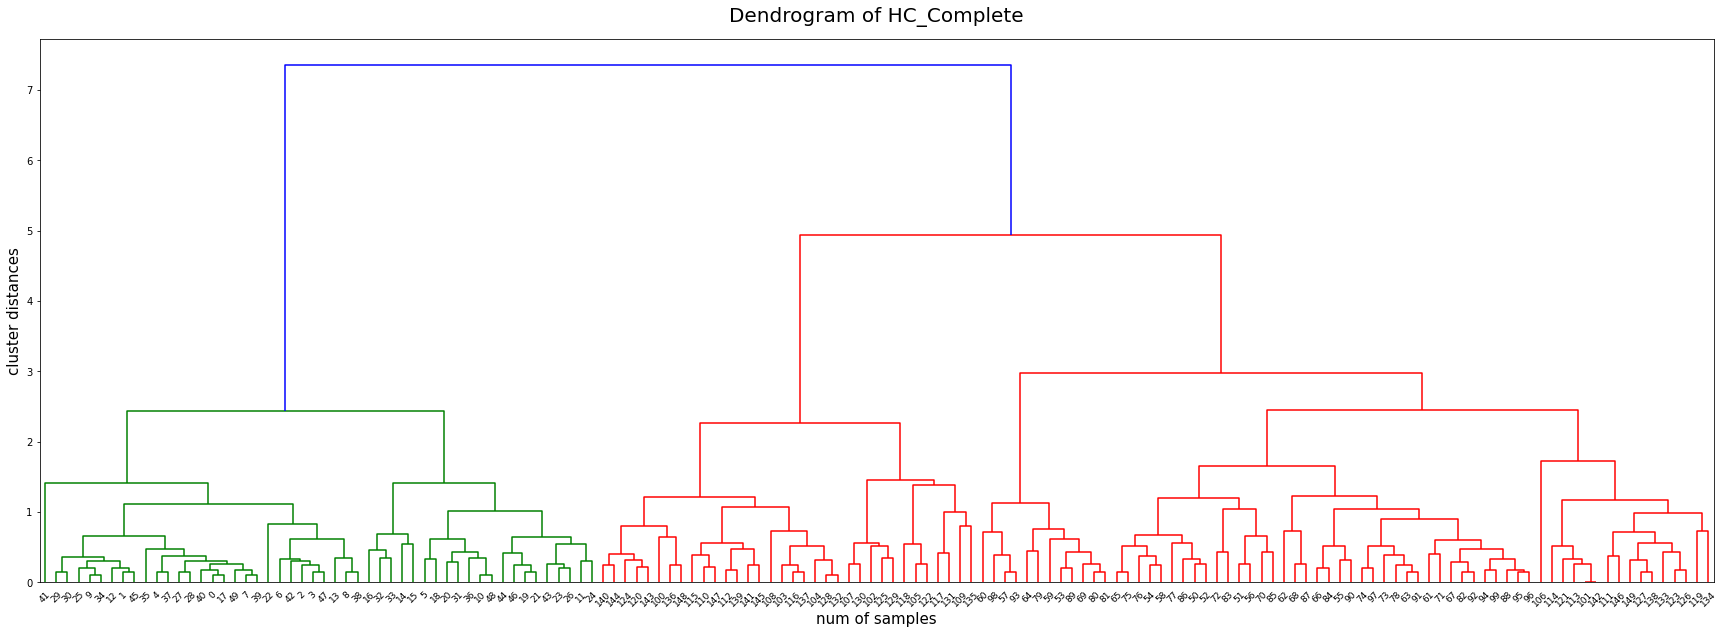

In [132]:
plt.figure(figsize = (30, 10))
dendrogram(HC_complete,
           leaf_rotation = 45,
           leaf_font_size = 9
           )
plt.title("Dendrogram of HC_Complete", size = 20, y = 1.02)
plt.xlabel('num of samples', size = 15)
plt.ylabel('cluster distances', size = 15)
plt.show()

### Predict Accuracy

In [121]:
predict = pd.DataFrame(fcluster(HC_complete, 3, criterion='distance'))
predict.columns=['predict']
crosstab = pd.crosstab(predict['predict'], labels['labels'])
crosstab

labels,0,1,2
predict,,,
1,50,0,0
2,0,0,34
3,0,50,16


- 16개의 데이터가 오분류되었다.

# Model(Hierachical Clustering - average method)

In [122]:
HC_average = linkage(data, method = 'average')

### Visualization Using Dendrogram

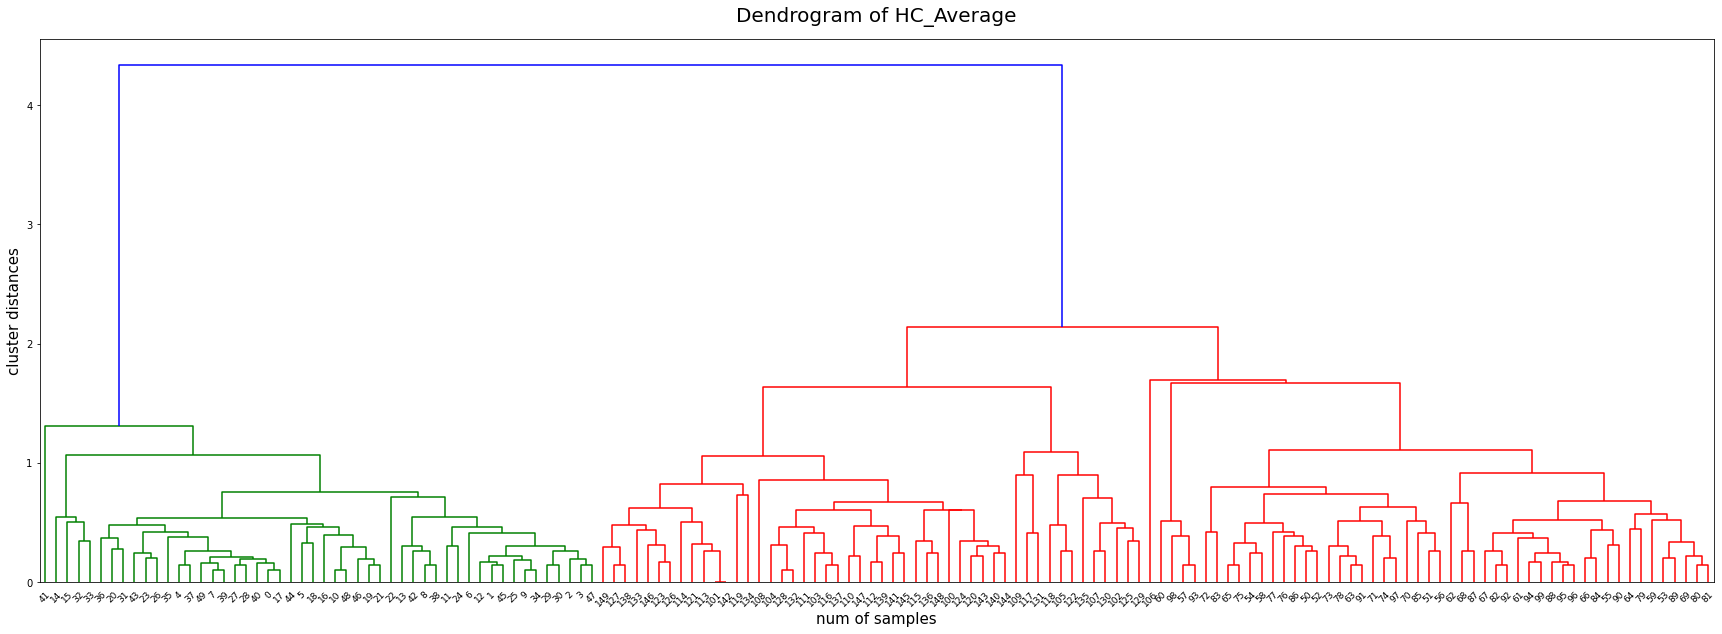

In [134]:
plt.figure(figsize = (30, 10))
dendrogram(HC_average,
           leaf_rotation = 45,
           leaf_font_size = 9
           )
plt.title("Dendrogram of HC_Average", size = 20, y = 1.02)
plt.xlabel('num of samples', size = 15)
plt.ylabel('cluster distances', size = 15)
plt.show()

### Predict Accuracy

In [136]:
predict = fcluster(HC_average, 2, criterion='distance')
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [147]:
predict = pd.DataFrame(fcluster(HC_average, 2, criterion='distance'))
predict.columns=['predict']
crosstab = pd.crosstab(predict['predict'], labels['labels'])
crosstab

labels,0,1,2
predict,,,
1,50,0,0
2,0,0,49
3,0,50,1


- 1개의 데이터가 오분류되었다.